<a href="https://colab.research.google.com/github/edaaydinea/rainfall_prediction/blob/master/RaiNo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting of Tomorrow Rainfall in Australia
*Input:* 23 features
* Date
* Location
* MinTemp
* MaxTemp
* Rainfall
* WindGust
* WindDir
* WinSpeed
* Humidity
* Pressure
* Cloud
* Temperature
* RainToday
* ...

*Target Class:* Yes(1) - No(0)
* 1 - tomorrow is rainy
* 0 - tomorrow isn't rainy

*How many datasets we have?:*

* Number of Instances : 142.193
* Target Class (Rain Tomorrow):  110316 Yes - 31877 No

*Data Source:* 
* [Rain in Australia](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package)



**Via kodluyoruz**

**INSTRUCTOR:** Çağlar SUBAŞI

**GROUP MEMBERS:**


*   Jiyan AYTEK - Assistant
*   Makbule Özge Özler - Assistant
*   Azize TOPÇU
*   Eda AYDIN
*   Enes KÖSER
*   Günnur GÜNEŞ
*   Leyla ALKAN

In [0]:
# import libraries

import pandas as pd # import pandas for data manipulation using dataframes
import numpy as np # import numpy for data statistical analysis
import matplotlib.pyplot as plt # import matplotlib for data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline
import psutil, os, gc, time

## **DATA PREPROCESSING**

In [0]:
# Read the dataset(.csv file) from github url
url = "https://raw.githubusercontent.com/edaaydinea/rainfall_prediction/master/weatherAUS.csv "
data = pd.read_csv(url)

# Dataset is now stored in a Pandas Dataframe

# Drop RISK_MM column
data = data.drop(columns=['RISK_MM'])

In [0]:
# Creating index column and put this column beginning of the dataframe

def IndexColumn(data):
  data['Index'] = range(1, len(data.index)+1)
  data.set_index("Index", inplace=True)

IndexColumn(data)

In [0]:
# Splitting the day, month and year features from date column

def Splitting(data):
  # import libraries
  import pandas as pd

  # Splitting the date column and creating new columns(day, month, year)
  data['year']= pd.DatetimeIndex(data['Date']).year
  data['month'] = pd.DatetimeIndex(data['Date']).month
  data['day'] = pd.DatetimeIndex(data['Date']).day

Splitting(data)
data.head()

Date Location  MinTemp  MaxTemp  ...  RainTomorrow  year  month day
Index                                         ...                               
1      2008-12-01   Albury     13.4     22.9  ...            No  2008     12   1
2      2008-12-02   Albury      7.4     25.1  ...            No  2008     12   2
3      2008-12-03   Albury     12.9     25.7  ...            No  2008     12   3
4      2008-12-04   Albury      9.2     28.0  ...            No  2008     12   4
5      2008-12-05   Albury     17.5     32.3  ...            No  2008     12   5

[5 rows x 26 columns]

In [0]:
# Create KEY column by merging the Date and Location columns for unique id
data['Key'] = data[['Date','Location']].agg('-'.join, axis=1)

In [0]:
# Checking the Key column is unique or not in the whole data 
data['Key'].nunique() == len(data)

True

In [0]:
# Data explorations
data.shape

(142193, 27)

In [0]:
data.head()

Date Location  MinTemp  ...  month  day                Key
Index                                ...                               
1      2008-12-01   Albury     13.4  ...     12    1  2008-12-01-Albury
2      2008-12-02   Albury      7.4  ...     12    2  2008-12-02-Albury
3      2008-12-03   Albury     12.9  ...     12    3  2008-12-03-Albury
4      2008-12-04   Albury      9.2  ...     12    4  2008-12-04-Albury
5      2008-12-05   Albury     17.5  ...     12    5  2008-12-05-Albury

[5 rows x 27 columns]

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 1 to 142193
Data columns (total 27 columns):
Date             142193 non-null object
Location         142193 non-null object
MinTemp          141556 non-null float64
MaxTemp          141871 non-null float64
Rainfall         140787 non-null float64
Evaporation      81350 non-null float64
Sunshine         74377 non-null float64
WindGustDir      132863 non-null object
WindGustSpeed    132923 non-null float64
WindDir9am       132180 non-null object
WindDir3pm       138415 non-null object
WindSpeed9am     140845 non-null float64
WindSpeed3pm     139563 non-null float64
Humidity9am      140419 non-null float64
Humidity3pm      138583 non-null float64
Pressure9am      128179 non-null float64
Pressure3pm      128212 non-null float64
Cloud9am         88536 non-null float64
Cloud3pm         85099 non-null float64
Temp9am          141289 non-null float64
Temp3pm          139467 non-null float64
RainToday        140787 non-null obje

In [0]:
data.describe()

MinTemp        MaxTemp  ...          month            day
count  141556.000000  141871.000000  ...  142193.000000  142193.000000
mean       12.186400      23.226784  ...       6.402544      15.715084
std         6.403283       7.117618  ...       3.426506       8.798150
min        -8.500000      -4.800000  ...       1.000000       1.000000
25%         7.600000      17.900000  ...       3.000000       8.000000
50%        12.000000      22.600000  ...       6.000000      16.000000
75%        16.800000      28.200000  ...       9.000000      23.000000
max        33.900000      48.100000  ...      12.000000      31.000000

[8 rows x 19 columns]

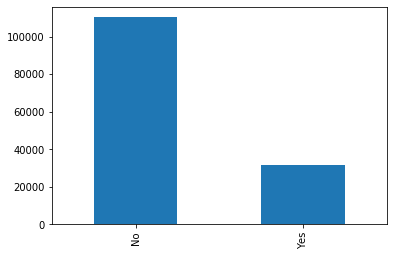

In [0]:
# Visualize the "RainTomorrow" column in the dataframe
data.RainTomorrow.value_counts().plot(kind="bar")

In [0]:
# Getting the count and percentage column by using target column

counts = data.RainTomorrow.value_counts()
percentage = data.RainTomorrow.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'Counts':counts,'Percentage': percentage})

Counts Percentage
No   110316      77.6%
Yes   31877      22.4%

In [0]:
def MissingUniqueStatistics(df):

    import io
    import pandas as pd
    
    import psutil, os, gc, time
    print("MissingUniqueStatistics process has began:\n")
    proc = psutil.Process(os.getpid())
    gc.collect()
    mem_0 = proc.memory_info().rss
    start_time = time.time()

    entry_lenght_list = []
    variable_name_list = []
    total_entry_list = []
    missing_value_number_list = []
    missing_value_ratio_list = []
    data_type_list = []
    unique_values_list = []
    number_of_unique_values_list = []

    for col in df.columns:

        buf = io.StringIO()
        df[[col]].info(buf=buf)
        data_info = buf.getvalue().split('\n') #converting to a string object done
        entry_lenght = int(data_info[1].split(' ')[1])
        variable_name = data_info[3].split(' ')[0]
        total_entry = int(data_info[3].split('    ')[1].split(' ')[0])
        missing_value_number = entry_lenght - total_entry
        missing_value_ratio = round(float(missing_value_number/entry_lenght),4)
        data_type = data_info[3].split('    ')[1].split(' ')[2]

        number_of_unique_values = len(df[col].unique())
        unique_values = df[col].unique()

        entry_lenght_list.append(entry_lenght)
        variable_name_list.append(variable_name)
        total_entry_list.append(total_entry)
        missing_value_number_list.append(missing_value_number)
        missing_value_ratio_list.append(missing_value_ratio)
        data_type_list.append(data_type)
        unique_values_list.append(unique_values)
        number_of_unique_values_list.append(number_of_unique_values)

    data_info_df = pd.DataFrame({'Variable': variable_name_list, '#_Total_Entry':total_entry_list,\
                                 '#_Missing_Value': missing_value_number_list,'%_Missing_Value':missing_value_ratio_list,\
                                 'Data_Type': data_type_list, 'Unique_Values': unique_values_list,\
                                 '#_Unique_Values':number_of_unique_values_list})
    
    print('MissingUniqueStatistics process has been completed!')
    print("--- in %s minutes ---" % ((time.time() - start_time)/60))

    return data_info_df.sort_values(by='%_Missing_Value', ascending=False)

In [0]:
data_info = MissingUniqueStatistics(data)
data_info

MissingUniqueStatistics process has began:

MissingUniqueStatistics process has been completed!
--- in 0.006055871645609538 minutes ---


Variable  ...  #_Unique_Values
6        Sunshine  ...              146
5     Evaporation  ...              357
18       Cloud3pm  ...               11
17       Cloud9am  ...               11
15    Pressure9am  ...              547
16    Pressure3pm  ...              550
9      WindDir9am  ...               17
7     WindGustDir  ...               17
8   WindGustSpeed  ...               68
10     WindDir3pm  ...               17
14    Humidity3pm  ...              102
20        Temp3pm  ...              501
12   WindSpeed3pm  ...               45
13    Humidity9am  ...              102
21      RainToday  ...                3
4        Rainfall  ...              680
11   WindSpeed9am  ...               44
19        Temp9am  ...              441
2         MinTemp  ...              390
3         MaxTemp  ...              506
25            day  ...               31
23           year  ...               11
24          month  ...               12
0            Date  ...             3436
22   RainTomorrow  ...                2
1        Location  ...               49
26            Key  ...           142193

[27 rows x 7 columns]

## **VARIABLE STRUCTURE (NUMERICAL/CATEGORICAL**

In [0]:
# Defining the categorical- nominal- cardinal variables as 'object' type
url2 = "https://github.com/edaaydinea/rainfall_prediction/blob/master/structure.xlsx?raw=true"
data_dictionary = pd.read_excel(url2)
data_dictionary = data_dictionary.set_index("variable_number")
data_dictionary

variable_definition  variable_structure
variable_number                                        
0                              Date             Ordinal
1                          Location             Nominal
2                           MinTemp  Continuous - Ratio
3                           MaxTemp  Continuous - Ratio
4                          Rainfall  Continuous - Ratio
5                       Evaporation  Continuous - Ratio
6                          Sunshine  Continuous - Ratio
7                       WindGustDir             Nominal
8                      WinGustSpeed  Continuous - Ratio
9                        WindDir9am             Nominal
10                       WindDir3pm             Nominal
11                     WindSpeed9am  Continuous - Ratio
12                     WindSpeed3pm  Continuous - Ratio
13                      Humidity9am  Continuous - Ratio
14                      Humidity3pm  Continuous - Ratio
15                      Pressure9am  Continuous - Ratio
16                      Pressure3pm  Continuous - Ratio
17                         Cloud9am             Ordinal
18                         Cloud3pm             Ordinal
19                          Temp9am  Continuous - Ratio
20                          Temp3pm  Continuous - Ratio
21                        RainToday             Nominal
22                     RainTomorrow             Nominal
23                             year             Nominal
24                            month             Nominal
25                              day             Nominal
26                              Key             Nominal

In [0]:
frames = [data_info, data_dictionary.loc[:,["variable_structure"]]]
data_info = pd.concat(frames,axis=1)
data_info

Variable  #_Total_Entry  ...  #_Unique_Values  variable_structure
0            Date         142193  ...             3436             Ordinal
1        Location         142193  ...               49             Nominal
2         MinTemp         141556  ...              390  Continuous - Ratio
3         MaxTemp         141871  ...              506  Continuous - Ratio
4        Rainfall         140787  ...              680  Continuous - Ratio
5     Evaporation          81350  ...              357  Continuous - Ratio
6        Sunshine          74377  ...              146  Continuous - Ratio
7     WindGustDir         132863  ...               17             Nominal
8   WindGustSpeed         132923  ...               68  Continuous - Ratio
9      WindDir9am         132180  ...               17             Nominal
10     WindDir3pm         138415  ...               17             Nominal
11   WindSpeed9am         140845  ...               44  Continuous - Ratio
12   WindSpeed3pm         139563  ...               45  Continuous - Ratio
13    Humidity9am         140419  ...              102  Continuous - Ratio
14    Humidity3pm         138583  ...              102  Continuous - Ratio
15    Pressure9am         128179  ...              547  Continuous - Ratio
16    Pressure3pm         128212  ...              550  Continuous - Ratio
17       Cloud9am          88536  ...               11             Ordinal
18       Cloud3pm          85099  ...               11             Ordinal
19        Temp9am         141289  ...              441  Continuous - Ratio
20        Temp3pm         139467  ...              501  Continuous - Ratio
21      RainToday         140787  ...                3             Nominal
22   RainTomorrow         142193  ...                2             Nominal
23           year         142193  ...               11             Nominal
24          month         142193  ...               12             Nominal
25            day         142193  ...               31             Nominal
26            Key         142193  ...           142193             Nominal

[27 rows x 8 columns]

## **MISSING ELIMINATION (SIMPLE/TREE-BASED/MODEL)**

In [0]:
data_info['Missing_Elimination']=""
for i in range(len(data_info)) :
      if data_info['%_Missing_Value'][i] <= (0.05):
          data_info['Missing_Elimination'][i]='Simple'
      elif data_info['%_Missing_Value'][i] < (0.25):
          data_info['Missing_Elimination'][i]='Tree-based'
      elif data_info['%_Missing_Value'][i] < (0.5) :
          data_info['Missing_Elimination'][i]='Model'
data_info


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Variable  #_Total_Entry  ...  variable_structure  Missing_Elimination
0            Date         142193  ...             Ordinal               Simple
1        Location         142193  ...             Nominal               Simple
2         MinTemp         141556  ...  Continuous - Ratio               Simple
3         MaxTemp         141871  ...  Continuous - Ratio               Simple
4        Rainfall         140787  ...  Continuous - Ratio               Simple
5     Evaporation          81350  ...  Continuous - Ratio                Model
6        Sunshine          74377  ...  Continuous - Ratio                Model
7     WindGustDir         132863  ...             Nominal           Tree-based
8   WindGustSpeed         132923  ...  Continuous - Ratio           Tree-based
9      WindDir9am         132180  ...             Nominal           Tree-based
10     WindDir3pm         138415  ...             Nominal               Simple
11   WindSpeed9am         140845  ...  Continuous - Ratio               Simple
12   WindSpeed3pm         139563  ...  Continuous - Ratio               Simple
13    Humidity9am         140419  ...  Continuous - Ratio               Simple
14    Humidity3pm         138583  ...  Continuous - Ratio               Simple
15    Pressure9am         128179  ...  Continuous - Ratio           Tree-based
16    Pressure3pm         128212  ...  Continuous - Ratio           Tree-based
17       Cloud9am          88536  ...             Ordinal                Model
18       Cloud3pm          85099  ...             Ordinal                Model
19        Temp9am         141289  ...  Continuous - Ratio               Simple
20        Temp3pm         139467  ...  Continuous - Ratio               Simple
21      RainToday         140787  ...             Nominal               Simple
22   RainTomorrow         142193  ...             Nominal               Simple
23           year         142193  ...             Nominal               Simple
24          month         142193  ...             Nominal               Simple
25            day         142193  ...             Nominal               Simple
26            Key         142193  ...             Nominal               Simple

[27 rows x 9 columns]

In [0]:
len(data.index) == data.shape[0]

True

In [0]:
data

Date Location  MinTemp  ...  month  day                Key
Index                                 ...                               
1       2008-12-01   Albury     13.4  ...     12    1  2008-12-01-Albury
2       2008-12-02   Albury      7.4  ...     12    2  2008-12-02-Albury
3       2008-12-03   Albury     12.9  ...     12    3  2008-12-03-Albury
4       2008-12-04   Albury      9.2  ...     12    4  2008-12-04-Albury
5       2008-12-05   Albury     17.5  ...     12    5  2008-12-05-Albury
...            ...      ...      ...  ...    ...  ...                ...
142189  2017-06-20    Uluru      3.5  ...      6   20   2017-06-20-Uluru
142190  2017-06-21    Uluru      2.8  ...      6   21   2017-06-21-Uluru
142191  2017-06-22    Uluru      3.6  ...      6   22   2017-06-22-Uluru
142192  2017-06-23    Uluru      5.4  ...      6   23   2017-06-23-Uluru
142193  2017-06-24    Uluru      7.8  ...      6   24   2017-06-24-Uluru

[142193 rows x 27 columns]

## **NUMERICAL/CATEGORICAL COLUMNS WITH MISSING ELIMINATION**

In [0]:
numerical_columns = list(data_info.loc[(data_info.loc[:,"variable_structure"]=="Continuous - Ratio")].index)
len(numerical_columns), numerical_columns

(14, [2, 3, 4, 5, 6, 8, 11, 12, 13, 14, 15, 16, 19, 20])

In [0]:
categorical_columns = list(data_info.loc[(data_info.loc[:,"variable_structure"]=="Nominal") | 
                                    (data_info.loc[:,"variable_structure"]=="Ordinal")].index)
len(categorical_columns), categorical_columns

(13, [0, 1, 7, 9, 10, 17, 18, 21, 22, 23, 24, 25, 26])

## **DATA SPLITTING (TRAIN / TEST)**

In [0]:
from sklearn.model_selection import train_test_split

X=data.drop(['RainTomorrow'],axis=1)
y=data.iloc[:,-4]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(99535, 26) (42658, 26) (99535,) (42658,)


In [0]:
data.to_pickle("./data_before_outlier.pkl")

In [0]:
data_before_outlier = pd.read_pickle("./data_before_outlier.pkl")
data_before_outlier.info

<bound method DataFrame.info of               Date Location  MinTemp  ...  month  day                Key
Index                                 ...                               
1       2008-12-01   Albury     13.4  ...     12    1  2008-12-01-Albury
2       2008-12-02   Albury      7.4  ...     12    2  2008-12-02-Albury
3       2008-12-03   Albury     12.9  ...     12    3  2008-12-03-Albury
4       2008-12-04   Albury      9.2  ...     12    4  2008-12-04-Albury
5       2008-12-05   Albury     17.5  ...     12    5  2008-12-05-Albury
...            ...      ...      ...  ...    ...  ...                ...
142189  2017-06-20    Uluru      3.5  ...      6   20   2017-06-20-Uluru
142190  2017-06-21    Uluru      2.8  ...      6   21   2017-06-21-Uluru
142191  2017-06-22    Uluru      3.6  ...      6   22   2017-06-22-Uluru
142192  2017-06-23    Uluru      5.4  ...      6   23   2017-06-23-Uluru
142193  2017-06-24    Uluru      7.8  ...      6   24   2017-06-24-Uluru

[142193 rows x 27 

## **OUTLIER HANDLING**

**OUTLIER DETECTION**

In [0]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

MinTemp           9.2
MaxTemp          10.3
Rainfall          0.8
Evaporation       4.8
Sunshine          5.7
WindGustSpeed    17.0
WindSpeed9am     12.0
WindSpeed3pm     11.0
Humidity9am      26.0
Humidity3pm      29.0
Pressure9am       9.5
Pressure3pm       9.6
Cloud9am          6.0
Cloud3pm          5.0
Temp9am           9.3
Temp3pm           9.8
year              4.0
month             6.0
day              15.0
dtype: float64


In [0]:
lower_bound_mintemp_x_train = X_train.MinTemp.quantile(0.25) - 1.5*IQR.MinTemp
lower_bound_maxtemp_x_train = X_train.MaxTemp.quantile(0.25) - 1.5*IQR.MaxTemp
lower_bound_windgustspeed_x_train = X_train.WindGustSpeed.quantile(0.25) - 1.5*IQR.WindGustSpeed
lower_bound_windspeed9am_x_train = X_train.WindSpeed9am.quantile(0.25) - 1.5*IQR.WindSpeed9am
lower_bound_windspeed3pm_x_train = X_train.WindSpeed3pm.quantile(0.25) - 1.5*IQR.WindSpeed3pm
lower_bound_humidity9am_x_train = X_train.Humidity9am.quantile(0.25) - 1.5*IQR.Humidity9am
lower_bound_humidity3pm_x_train = X_train.Humidity3pm.quantile(0.25)- 1.5*IQR.Humidity3pm
lower_bound_pressure9am_x_train = X_train.Pressure9am.quantile(0.25) - 1.5*IQR.Pressure9am
lower_bound_pressure3pm_x_train = X_train.Pressure3pm.quantile(0.25) - 1.5*IQR.Pressure3pm
lower_bound_temp9am_x_train = X_train.Temp9am.quantile(0.25)- 1.5*IQR.Temp9am
lower_bound_temp3pm_x_train = X_train.Temp3pm.quantile(0.25) - 1.5*IQR.Temp3pm
lower_bound_evaporation_x_train = X_train.Evaporation.quantile(0.25) - 1.5*IQR.Evaporation

upper_bound_mintemp_x_train = X_train.MinTemp.quantile(0.75) + 1.5*IQR.MinTemp
upper_bound_maxtemp_x_train = X_train.MaxTemp.quantile(0.75) + 1.5*IQR.MaxTemp
upper_bound_windgustspeed_x_train = X_train.WindGustSpeed.quantile(0.75) + 1.5*IQR.WindGustSpeed
upper_bound_windspeed9am_x_train = X_train.WindSpeed9am.quantile(0.25) - 1.5*IQR.WindSpeed9am
upper_bound_windspeed3pm_x_train = X_train.WindSpeed3pm.quantile(0.75) + 1.5*IQR.WindSpeed3pm
upper_bound_humidity9am_x_train = X_train.Humidity9am.quantile(0.75) + 1.5*IQR.Humidity9am
upper_bound_humidity3pm_x_train = X_train.Humidity3pm.quantile(0.75) + 1.5*IQR.Humidity3pm
upper_bound_pressure9am_x_train = X_train.Pressure9am.quantile(0.75) + 1.5*IQR.Pressure9am
upper_bound_pressure3pm_x_train = X_train.Pressure3pm.quantile(0.75) + 1.5*IQR.Pressure3pm
upper_bound_temp9am_x_train = X_train.Temp9am.quantile(0.75) + 1.5*IQR.Temp9am
upper_bound_temp3pm_x_train = X_train.Temp3pm.quantile(0.75) + 1.5*IQR.Temp3pm
upper_bound_evaporation_x_train = X_train.Evaporation.quantile(0.75) + 1.5*IQR.Evaporation

False means that these values are valid whereas True indicates presence of an outlier

In [0]:
X_train.MinTemp=np.where(X_train.MinTemp>(upper_bound_mintemp_x_train),1.25*(upper_bound_mintemp_x_train),X_train.MinTemp)
X_train.MaxTemp= np.where(X_train.MaxTemp > (upper_bound_maxtemp_x_train), 1.25*(upper_bound_maxtemp_x_train),X_train.MaxTemp)
X_train.WindGustSpeed= np.where(X_train.WindGustSpeed > (upper_bound_windgustspeed_x_train), 1.25*(upper_bound_windgustspeed_x_train),X_train.WindGustSpeed)
X_train.WindSpeed9am= np.where(X_train.WindSpeed9am > (upper_bound_windspeed9am_x_train), 1.25*(upper_bound_windspeed9am_x_train),X_train.WindSpeed9am)
X_train.WindSpeed3pm= np.where(X_train.WindSpeed3pm > (upper_bound_windspeed3pm_x_train), 1.25*(upper_bound_windspeed3pm_x_train),X_train.WindSpeed3pm)
X_train.Humidity9am= np.where(X_train.Humidity9am > (upper_bound_humidity9am_x_train), 1.25*(upper_bound_humidity9am_x_train),X_train.Humidity9am)
X_train.Humidity3pm= np.where(X_train.Humidity3pm > (upper_bound_humidity3pm_x_train), 1.25*(upper_bound_humidity3pm_x_train),X_train.Humidity3pm)
X_train.Pressure9am= np.where(X_train.Pressure9am > (upper_bound_pressure9am_x_train), 1.25*(upper_bound_pressure9am_x_train),X_train.Pressure9am)
X_train.Pressure3pm= np.where(X_train.Pressure3pm > (upper_bound_pressure3pm_x_train), 1.25*(upper_bound_pressure3pm_x_train),X_train.Pressure3pm)
X_train.Temp9am= np.where(X_train.Temp9am > (upper_bound_temp9am_x_train), 1.25*(upper_bound_temp9am_x_train),X_train.Temp9am)
X_train.Temp3pm= np.where(X_train.Temp3pm > (upper_bound_temp3pm_x_train), 1.25*(upper_bound_temp3pm_x_train),X_train.Temp3pm)
X_train.Evaporation= np.where(X_train.Evaporation > (upper_bound_evaporation_x_train), 1.25*(upper_bound_evaporation_x_train),X_train.Evaporation)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


**MISSING DATA HANDLING**

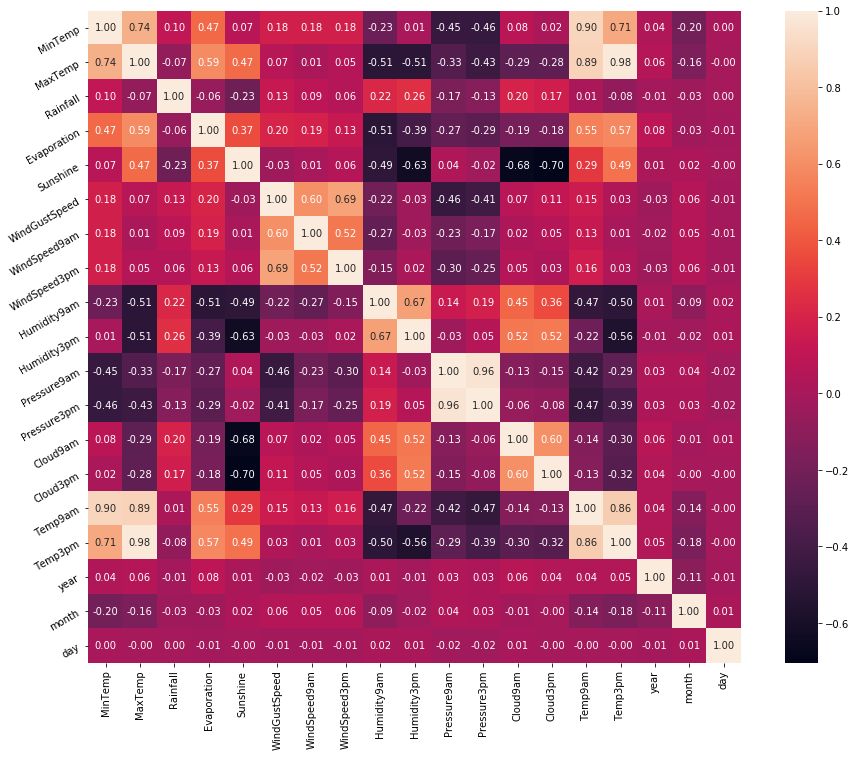

In [0]:
correlation = data.corr()

plt.figure(figsize=(16,12))
plt.title =("Correlation Heatmap")
ax = sns.heatmap(correlation, square = True, annot = True, fmt =".2f", linecolor="white")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

**Selection the columns for determination of missing data handling according to high correlation values**

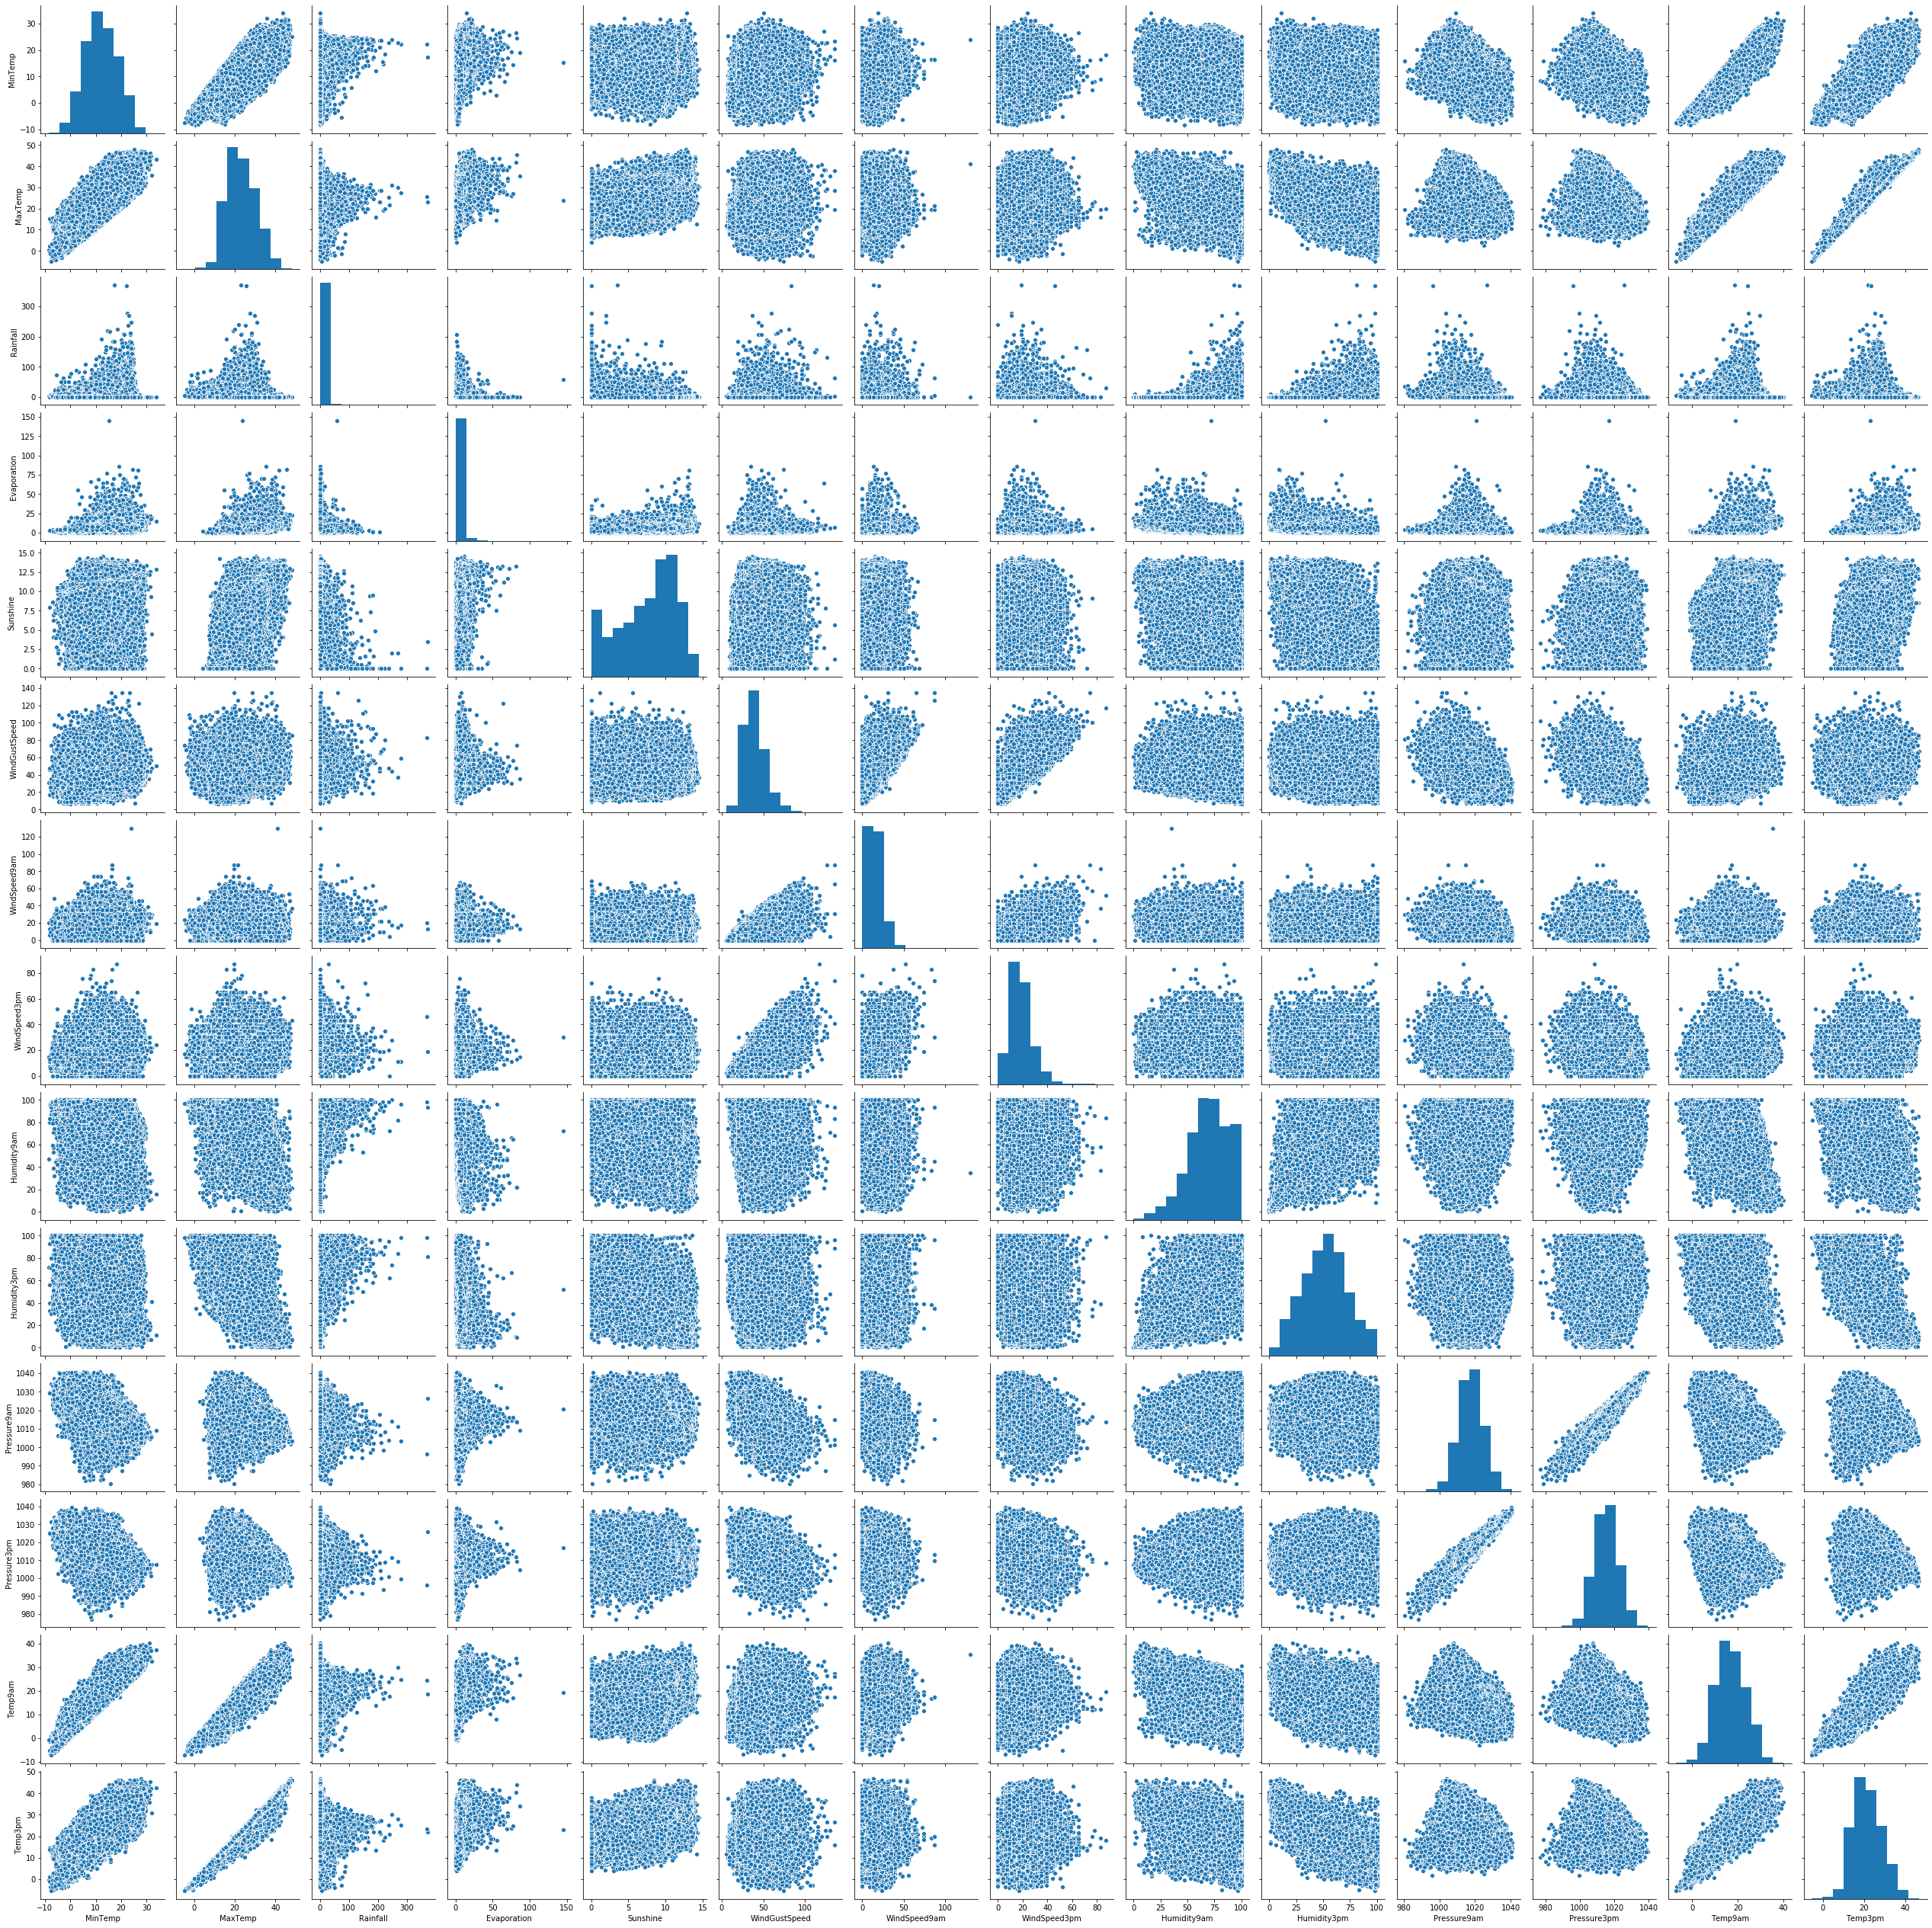

In [0]:
features = ["MinTemp", "MaxTemp","Rainfall","Evaporation",  "Sunshine", "WindGustSpeed", "WindSpeed9am", "WindSpeed3pm", "Humidity9am", "Humidity3pm", "Pressure9am", "Pressure3pm", "Temp9am", "Temp3pm"]
sns.pairplot(data[features])


In [0]:
X_train.MinTemp = X_train.MinTemp.fillna(X_train.MinTemp.mean())
X_train.MaxTemp = X_train.MaxTemp.fillna(X_train.MaxTemp.mean())
X_train.WindGustSpeed = X_train.WindGustSpeed.fillna(X_train.WindGustSpeed.median())
X_train.WindSpeed9am = X_train.WindSpeed9am.fillna(X_train.WindSpeed9am.median())
X_train.WindSpeed3pm = X_train.WindSpeed3pm.fillna(X_train.WindSpeed3pm.median())
X_train.Humidity9am = X_train.Humidity9am.fillna(X_train.Humidity9am.mean())
X_train.Humidity3pm = X_train.Humidity3pm.fillna(X_train.Humidity3pm.mean())
X_train.Pressure9am = X_train.Pressure9am.fillna(X_train.Pressure9am.mean())
X_train.Pressure3pm = X_train.Pressure3pm.fillna(X_train.Pressure3pm.mean())
X_train.Temp9am = X_train.Temp9am.fillna(X_train.Temp9am.mean())
X_train.Temp3pm = X_train.Temp3pm.fillna(X_train.Temp3pm.mean())
X_train.Rainfall = X_train.Rainfall.fillna(0)


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [0]:
X_test.MinTemp = X_test.MinTemp.fillna(X_train.MinTemp.mean())
X_test.MaxTemp = X_test.MaxTemp.fillna(X_train.MaxTemp.mean())
X_test.WindGustSpeed = X_test.WindGustSpeed.fillna(X_train.WindGustSpeed.median())
X_test.WindSpeed9am = X_test.WindSpeed9am.fillna(X_train.WindSpeed9am.median())
X_test.WindSpeed3pm = X_test.WindSpeed3pm.fillna(X_train.WindSpeed3pm.median())
X_test.Humidity9am = X_test.Humidity9am.fillna(X_train.Humidity9am.mean())
X_test.Humidity3pm = X_test.Humidity3pm.fillna(X_train.Humidity3pm.mean())
X_test.Pressure9am = X_test.Pressure9am.fillna(X_train.Pressure9am.mean())
X_test.Pressure3pm = X_test.Pressure3pm.fillna(X_train.Pressure3pm.mean())
X_test.Temp9am = X_test.Temp9am.fillna(X_train.Temp9am.mean())
X_test.Temp3pm = X_test.Temp3pm.fillna(X_train.Temp3pm.mean())
X_test.Rainfall = X_test.Rainfall.fillna(0)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [0]:
# Checking missing values in numerical variables in X_train
X_train.isnull().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation      42685
Sunshine         47555
WindGustDir       6489
WindGustSpeed        0
WindDir9am        7018
WindDir3pm        2634
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am         37698
Cloud3pm         40070
Temp9am              0
Temp3pm              0
RainToday         1034
year                 0
month                0
day                  0
Key                  0
dtype: int64

In [0]:
# Checking missing values in numerical variables in X_test
X_test.isnull().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation      18158
Sunshine         20261
WindGustDir       2841
WindGustSpeed        0
WindDir9am        2995
WindDir3pm        1144
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am         15959
Cloud3pm         17024
Temp9am              0
Temp3pm              0
RainToday          372
year                 0
month                0
day                  0
Key                  0
dtype: int64

**One - Hot Encoding**

**VISUALIZING THE DATA**